In [1]:
import cptac
import cptac.utils as u
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
en = cptac.Endometrial()
col = cptac.Colon()
br = cptac.Brca()

In [3]:
gene = 'PIK3CA'

In [4]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [5]:
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]

# Now look at the cis effect for endometrial cancer 
(that is the difference in missense mutation between wildtype_tumor and missense_mutation)

In [6]:
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])
prot = en.get_proteomics() #get proteomic data
missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
endo_missense = missense
endo_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
C3L-00006,Missense_Mutation,-0.4500
C3L-00008,Wildtype_Tumor,-0.2150
C3L-00032,Missense_Mutation,-0.1780
C3L-00090,Wildtype_Tumor,-0.3920
C3L-00136,Wildtype_Tumor,-0.3490
...,...,...
C3N-01510,Missense_Mutation,-0.3730
C3N-01520,Missense_Mutation,-0.4860
C3N-01537,Wildtype_Tumor,-0.0312


# Cis effects for BRCA

In [7]:
#Prioritize hotspot mutations
brca = br.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [8]:
#pull out all the missense mutation and wildtype tumors 
brca_missense = brca.loc[(brca['Mutation'] == "Missense_Mutation") | (brca['Mutation'] == "Wildtype_Tumor")]

In [9]:
#drop everything but the mutation column and join to proteomic data
brca_missense = brca_missense.drop(columns=['Location', 'Mutation_Status'])
prot = br.get_proteomics() #get proteomic data
brca_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
brca_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
CPT001846,Missense_Mutation,0.6245
X01BR001,Wildtype_Tumor,-0.6810
X01BR008,Wildtype_Tumor,-0.9478
X01BR020,Wildtype_Tumor,-0.8300
X01BR023,Wildtype_Tumor,0.5457
...,...,...
X20BR008,Missense_Mutation,0.4727
X21BR002,Missense_Mutation,0.3150
X21BR010,Missense_Mutation,0.1131


# Cis effect for Colon

In [10]:
#Prioritize hotspot mutations
colon = col.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


In [11]:
colon['Mutation'].unique()

array(['Wildtype_Tumor', 'Amplification', 'nonframeshift substitution',
       'nonsynonymous SNV', 'Deletion', 'nonsynonymous SNV_hotspot',
       'frameshift substitution'], dtype=object)

In [12]:
#pull out all the missense mutation and wildtype tumors 
colon_missense = colon.loc[(colon['Mutation'] == "nonsynonymous SNV") | (colon['Mutation'] == "Wildtype_Tumor")]

In [13]:
#drop everything but the mutation column and join to proteomic data
colon_missense = colon_missense.drop(columns=['Location', 'Mutation_Status'])
prot = col.get_proteomics() #get proteomic data
colon_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
colon_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
01CO001,Wildtype_Tumor,NaN
01CO005,Wildtype_Tumor,NaN
01CO006,Wildtype_Tumor,-0.515
01CO013,Wildtype_Tumor,0.106
01CO015,Wildtype_Tumor,-0.687
...,...,...
20CO007,nonsynonymous SNV,-0.245
22CO004,Wildtype_Tumor,-0.817
22CO006,Wildtype_Tumor,0.177


# Final Graph

In [14]:
endo_missense = endo_missense.assign(cancer = 'Endometrial')
brca_missense = brca_missense.assign(cancer = 'Brca')
colon_missense = colon_missense.assign(cancer = 'Colon')

In [17]:
df = endo_missense.append(brca_missense)
df = df.append(colon_missense)

df

Name,Mutation,PIK3CA_proteomics,cancer
Patient_ID,,,
C3L-00006,Missense_Mutation,-0.450,Endometrial
C3L-00008,Wildtype_Tumor,-0.215,Endometrial
C3L-00032,Missense_Mutation,-0.178,Endometrial
C3L-00090,Wildtype_Tumor,-0.392,Endometrial
C3L-00136,Wildtype_Tumor,-0.349,Endometrial
...,...,...,...
20CO007,nonsynonymous SNV,-0.245,Colon
22CO004,Wildtype_Tumor,-0.817,Colon
22CO006,Wildtype_Tumor,0.177,Colon


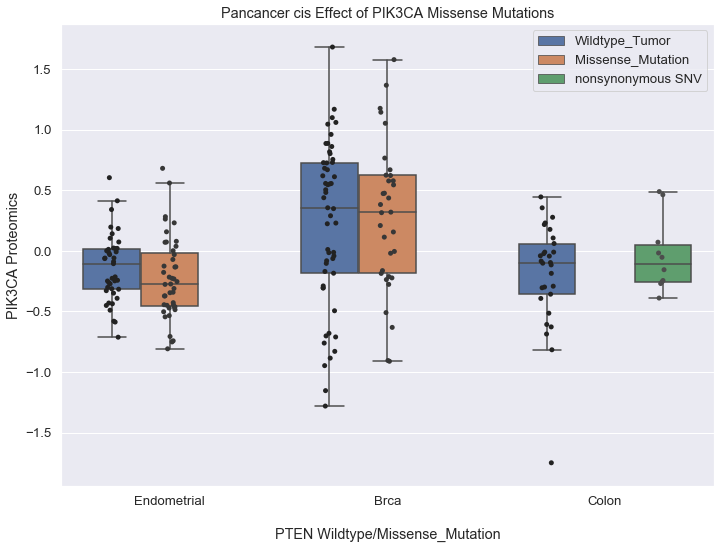

In [31]:
# pancancer cis plot
gene = 'PIK3CA'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='cancer', y=gene+"_proteomics", data = df, hue = 'Mutation',
                      hue_order = ["Wildtype_Tumor", "Missense_Mutation","nonsynonymous SNV"], showfliers = False)    
boxplot.set_title('Pancancer cis Effect of PIK3CA Missense Mutations')
boxplot = sns.stripplot(x='cancer', y=gene+"_proteomics", data = df, jitter = True, 
                           color = ".3", hue = 'Mutation', hue_order = ["Wildtype_Tumor", "Missense_Mutation", 'nonsynonymous SNV'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Missense_Mutation", ylabel = gene+' Proteomics')

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3])

# format_pval_annotation('*', -.3, 0, 1.3)
# format_pval_annotation('*', .7, 1, 2.6)
# format_pval_annotation('*', 1.7, 2, 1.6)
# format_pval_annotation('ns', 2.7, 3, 1)
# format_pval_annotation('*', 3.8, 4.2, 1)

plt.show()
plt.clf()
plt.close()

In [28]:
fig = boxplot.get_figure()
fig.savefig("cis_effects_proteomics.png")